In [2]:
# Importa las librerías necesarias
from math import sqrt, acos, degrees
from functools import reduce

# Geometría Analítica

Rama de las matemáticas dedicada al estudio en profundidad de las figuras geométricas y sus respectivos datos, tales como áreas, distancias, volúmenes, puntos de intersección, ángulos de inclinación etc. Para ello emplea técnicas básicas de análisis matemático y de álgebra. [1].

## Conceptos generales

- **Espacio vectorial.** Un **conjunto** de elementos llamados vectores que pueden sumarse entre sí y multiplicarse por escalares.
- **Escalar.** Es un **número** que puede utilizarse para redimensionar un vector sin cambiar su dirección.
- **Dirección ortogonal.** Se refieren a dos o más direcciones que son perpendiculares entre sí en un espacio geométrico.
- **Matriz traspuesta.** Una matriz traspuesta es el resultado de reordenar la matriz original mediante el cambio de filas por columnas y las columnas por filas en una nueva matriz.

## Normas

Una norma **es una función** que asigna un número real a un vector, y tiene ciertas propiedades que reflejan la intuición de longitud o magnitud en el espacio.

Estas se denotan como $\|x\|$ y tiene las siguientes propiedades:
1. **No negatividad.** La norma de un vector es siempre no negativa: $\|x\| \geq 0$
2. **Definitud**. La norma de un vector es igual a cero si y solo si el vector es el vector cero: 
$\|x\| = 0$ si y sólo si $x = 0$
3. **Homogeneidad.** Para cualquier escalar $\alpha$, la norma del vector escalado es igual al valor absoluto del escalar multiplicado por la norma del vector original: $\|\alpha x\| = |\alpha| \|x\|$
4. **Desigualdad triangular.** La norma de la suma de dos vectores es siempre menor o igual a la suma de las normas de los vectores individuales. $\|x + y\| \leq \|x\| + \|y\|$

### Utilidad de las Normas

1. **Norma Euclidiana (L2-Norm):** La norma Euclidiana de un vector $x = (x_1, x_2, ..., x_n)$ en $\mathbb{R}^n$ se define como: $\|x\|_2 = \sqrt{x_1 ^ 2 + x_2 ^ 2 + ... + x_n ^ 2}$

Esta mide la distancia desde el origen hasta el punto representado por el vector. Es útil para calcular distancias en geometría y es comúnmente utilizada en algoritmos de aprendizaje automático, como la **regresión lineal** y las **máquinas de vectores de soporte** (SVM).

2. **Norma Manhattan (L1-Norm):** La norma L1 de un vector $x$ en $\mathbb{R}^n$ se define como: $\|x\|_1 = |x_1| + |x_2| + ... + |x_n|$

Es la suma de los valores absolutos de las componentes del vector. Es útil en problemas donde la diferencia absoluta entre las variables es importante, como en la **selección de características** en el aprendizaje automático.

3. **Norma del Infinito:** La norma del infinito de un vector $x$ en $\mathbb{R}^n$ se define como: $\|x\|_{\infty} = max(|x_1|, |x_2|, ..., |x_n|)$

La norma del infinito es simplemente el valor absoluto máximo de las componentes del vector. Es útil en problemas donde la magnitud máxima es importante, como en la **optimización de recursos**.

*"La distancia Manhattan es mayor que la distancia Euclídea, pero también es más real en la práctica"* [2]

![image.png](https://metode.es/wp-content/uploads/2017/09/105-94-grima-distancias.jpg)

### Ejemplo

Dado el vector $x = (3, -4)$

In [3]:
vector_x = (3, -4)

- **Norma Euclidiana:** $\|x\|_2 = \sqrt{3^2 + (-4) ^ 2} = 5$

In [4]:
def calcular_norma_euclidiana(vector):
    return sqrt(
        reduce(lambda a, b: (a)**2 + (b)**2, vector))

norma_euclidiana = calcular_norma_euclidiana(vector_x)
print("‖x‖_2 =", norma_euclidiana)

‖x‖_2 = 5.0


- **Norma Manhattan:** $\|x\|_1 = |3| + |-4| = 7$

In [5]:
def calcular_norma_manhattan(vector):
    return reduce(
        lambda a, b: abs(a) + abs(b), vector)

norma_manhattan = calcular_norma_manhattan(vector_x)
print("‖x‖_1 =", norma_manhattan)

‖x‖_1 = 7


- **Norma del infinito:** $\|x\|_{\infty} = max(|3|, |-4|) = 4$

In [6]:

# Guarda todos los valores absolutos de los componentes del vector
valores_absolutos = map(lambda componente: abs(componente), vector_x)

# Pasa el valor absoluto de todas las componentes del vector al método max
norma_infinito = max(*valores_absolutos) 

print("‖x‖_∞ =", norma_infinito)

‖x‖_∞ = 4


## Producto Interno

También conocido como producto escalar o producto punto, es una operación en álgebra lineal que generaliza el concepto de multiplicación de vectores para espacios vectoriales. Es una función que toma dos vectores y devuelve un número escalar. En otras palabras, el producto interno **mide la similitud** entre dos vectores en un espacio vectorial.

Un producto interno $\langle u, v \rangle$ o $u \cdot v$ tiene las siguientes propiedades:
1. **Linealidad en la primera entrada:** Para cualquier vector $u$ y escalares $\alpha$ y $\beta$, se cumple $\langle \alpha u + \beta v, w \rangle = \alpha \langle u, w \rangle + \beta \langle v, w \rangle$ 
2. **Conmutatividad:** $\langle u, v \rangle = \langle v, u \rangle$
3. **Positividad definida:** $\langle u, u \rangle \geq 0$, y $\langle u, u \rangle = 0$ si y solo si $u$ es el vector cero.
4. **Aditividad en la segunda entrada:** Para cualquier vector $u$, se cumple $\langle u, v + w \rangle = \langle u, v \rangle + \langle u, w \rangle$

### Producto Punto

Permite calcular la **similitud direcional** entre dos vectores.

Supongamos que hay dos vectores en un espacio tridimensional, $A = (a_1, a_2, a_3)$ y $B = (b_1, b_2, b_3)$. El producto punto entre estos dos vectores, denotado como $A \cdot B$ o $\langle A, B \rangle$, se calcula multiplicando las componentes correspondientes de los vectores y luego sumándolas:
$$ A \cdot B = a_1 \times b_1 + a_2 \times b_2 + a_3 \times b_3$$

El producto punto tiene una interpretación geométrica interesante. Si se conideran $A$ y $B$ como vectores en el espacio tridimensional, el producto punto $A \cdot B$ es igual al producto de la magnitud de $A$, la magnitud de $B$, y el coseno del ángulo $\theta$ entre ellos:
$$ A \cdot B = |A| \times |B| \times cos(\theta)$$

#### Utilidad
Imagine que tiene dos vectores que representan dos direcciones en un mapa. Si toma el producto punto de estos vectores, obtienes un número. Si este número es grande, significa que las dos direcciones son muy similares. Si es pequeño, las direcciones son diferentes. En otras palabras, el producto punto nos dice **qué tan en la misma dirección** están dos vectores.

El producto punto es una operación esencial en muchas aplicaciones, incluyendo proyecciones vectoriales, cálculos de trabajo y energía en física, y técnicas de aprendizaje automático como el algoritmo de máquinas de soporte vectorial (SVM).

![image.png](https://cdn.kastatic.org/ka-perseus-graphie/546be9ae675513eb4aa38ebbed698b731f123647.svg)

#### Ejemplo

Considere dos vectores $A = (2, 3)$ y $B = (4, -1)$

In [7]:
vector_A = (2, 3)
vector_B = (4, -1)

El producto punto sería: $A \cdot B = (2 \times 4) + (3 \times -1) = 5$

In [8]:
def calcular_producto_punto(*vectores):
    return reduce(
        lambda x, y: x + y,
        [a * b for a, b in zip(*vectores)])

producto_punto = calcular_producto_punto(vector_A, vector_B)
print("Producto punto:", producto_punto)

Producto punto: 5


## Longitudes y distancias

### Longitud

La longitud de un vector en un espacio vectorial puede determinarse utilizando el conceto de producto interno. Cuando se habla de la longitud de un vector, se refiere a su norma, que indica su magnitud o tamaño.
En el contexto del producto interno, la norma (o longitud) de un vector $v$ en un espacio vectorial $V$ se calcula utilizando el producto interno de ese vector consigo mismo, es decir, $\langle v, v \rangle$. La fórmula general para la norma de un vector $v$ utilizando el producto interno es:
$$\|v\| = \sqrt{\langle v, v \rangle}$$

### Distancia

En el contexto de los vectores en un espacio vectorial, la distancia entre dos puntos (representados como vectores) se pueden medir de varias maneras, depediendo del contexto y de la norma (o medida de longitud) que se utiice. Las distancias pueden calcularse usando diferentes normas, como la Euclidiana (L2) y la Manhattan (L1).

##### Distancia Euclidiana

La distancia euclidiana entre dos puntos $u$ y $v$ en un espacio vectorial se calcula utilizando la norma Euclidiana (L2 norm) de la diferencia entre los puntos.
$$d(u, v) := \|u - v\|_2 = \sqrt{(u_1 - v_1)^2 + (u_2 - v_2)^2 + ... + (u_n - v_n)^2}$$
Esta formula mide la distancia "en línea recta" entre dos puntos y es la distancia más comúnmente usada en geometría.

##### Ejemplo

Dado los vectores $u = (3, 4)$ y $v = (1, -2)$

$$d(u, v) := \|u - v\|_2 = \sqrt{\langle u - v, u - v \rangle}$$
$$= \sqrt{(3 - 1) ^ 2 + (4 - (-2)) ^ 2}$$
$$= \sqrt{2^2 + 6^2}$$
$$= \sqrt{40} $$
$$= 2 \sqrt{10} $$

In [9]:
def calcular_distancia_euclidiana(*vectores):
    return sqrt(
        reduce(
            lambda a, b: a + b,
            [(u - v)**2 for u, v in zip(*vectores)]))

vector_u = (3, 4)
vector_v = (1, -2)
distancia_euclidiana = calcular_distancia_euclidiana(vector_u, vector_v)

print("Distancia Euclidiana:", distancia_euclidiana)

Distancia Euclidiana: 6.324555320336759


#### Distancia de Manhattan

La distancia de Manhattan entre dos puntos $u$ y $v$ se calcula utilizando la norma L1 de la diferencia entre los puntos.
$$d(u, v) := \|u - v\|_1 = |u_1 - v_1| + |u_2 - v_2| + ... + |u_n - v_n|$$
Esta fórmula mide la distancia "en línea recta horizontal y vertical" entre dos puntos y es útil cuando se permite moverse solo en direcciones ortogonales.

##### Ejemplo

Dado los vectores $u = (3, 5)$ y $v = (1, 2)$
$$d(u, v) := \|u - v\|_1 = |3 - 1| + |5 - 2| = 5$$

In [10]:
def calcular_distancia_manhattan(*vectores):
    return reduce(
        lambda a, b: a + b,
        [abs(u - v) for u, v in zip(*vectores)])

vector_u = (3, 5)
vector_v = (1, 2)
distancia_manhattan = calcular_distancia_manhattan(vector_u, vector_v)

print("Distancia Manhattan:", distancia_manhattan)

Distancia Manhattan: 5


## Ángulos y ortogonalidad

### Medición de ángulos

Se puede hacer uso del producto punto para calcular el ángulo entre dos vectores $u$ y $v$. Esta consiste en:
$$cos(\theta) = \frac{\langle u, v \rangle}{\|u\|\|v\|}$$ 
Esta fórmula muestra que el coseno del ángulo entre dos vectores es igual al producto punto de los vectores dividio por el producto de sus normas.

#### Ejemplo

Suponga que tiene dos vectores en $\mathbb{R}^2$:
$u = (3, 4)$
$v = (-1, 2)$

Ahora para calcular el ángulo $\theta$ entre estos dos vectores:

**Paso 1:** Calcular el producto punto de $u$ y $v$:

$\langle u, v \rangle = (3 \times -1) + (4 \times 2) = -3 + 8 = 5$

**Paso 2:** Calcular las normas de $u$ y $v$:

$\|u\| = \sqrt{3^2 + 4^2} = 5$

$\|v\| = \sqrt{(-1)^2 + 2^2} = \sqrt{5}$

**Paso 3:** Aplicar la fórmula para calcular el coseno del ángulo:

$cos(\theta) = \frac{\langle u, v \rangle}{\|u\|\|v\|} = \frac{5}{5\sqrt{5}}$

**Paso 4:** Calcular el ángulo $\theta$:

$\theta = cos^{-1}(\frac{5}{5\sqrt{5}})$

$\theta \approx cos^{-1}(0.4472)$

$\theta \approx 63.4349\degree$

In [11]:
vector_u = (3, 4)
vector_v = (-1, 2)

# Paso 1; Calcular el producto punto
producto_punto = calcular_producto_punto(vector_u, vector_v)

# Paso 2: Calcular las normas
norma_u = calcular_norma_euclidiana(vector_u)
norma_v = calcular_norma_euclidiana(vector_v)

# Paso 3: Calcular el ángulo
theta = degrees(
    acos(producto_punto / (norma_u * norma_v)))

print(f"Theta = {theta}°")

Theta = 63.43494882292201°


### Ortogonalidad

Se define la ortogonalidad como la relación entre dos vectores que forman un ángulo de 90 grados (o $\frac{\pi}{2}$ radianes) entre sí.

Considerando el producto punto para verificar la ortogonalidad. Dos vectores son ortogonales si y solo si su produto punto es igual a cero:

$\langle u, v \rangle = 0$

## Base ortonormal

Una **base ortonormal** para un espacio vectorial es un conjunto de vectores que es **ortonormal** (los vectores son mutuamente ortogonales) y **normalizado** (cada vector tiene una longitud de 1 unidad).

Formalmente, un conjunto de vectores ${v_1, v_2, ..., v_n}$ en un espacio vectorial $V$ se considera una base ortonormal si cumple dos condiciones: 

1. **Ortogonalidad:** $\langle v_i, v_j \rangle = 0$ para $i \neq j$
2. **Normalización:** $\|v_i\| = 1$ para todo $i$

En geometría, los vectores de una base ortonormal pueden utilizarse para describir cualquier punto en el espacio de manera única mediante combinaciones lineales.

## Complemento Ortogonal

El complemento ortogonal es un concepto fundamental en álgebra lineal y geometría que se utiliza para describir una relación especial entre dos subespacios vectoriales.

Tome un conjunto $V$ cualquiera. El complemento ortogonal de $V$ sería otro conjunto $W$, cuyos elementos son ortogonales a los elementos de $V$ [4].

![image.png](https://lh3.googleusercontent.com/Lals58OAUFbC4OkfB6UCICEcoBnM5qlc3agI2tTkN_PPDXLLSoOLHK07HeEqdy84t_SJW43PC_fuO-l92lfxDlDBjCe7CKlsINBe4E-X4X73TMJ46HanP7K3IC0Ni0ych_s_6Ltt)

### Propiedades y características

- **Ortogonalidad:** Cada vector en el complemento ortogonal es ortogonal a cada vector en $W$.
- **Suma directa:** La suma de $W$ y su complemento ortogonal forma todo el espacio $V$. Esto se le llama suma directa y se denota como $V = W \oplus W^\perp$ donde $W^\perp$ representa el complemento ortogonal de $W$.
- **Proyección ortogonal:** Los vectores en el complemento ortogonal son aquellos sobre los cuales podemos proyectar cualquier vector de $V$ para separar su componente en $W$ de su componente ortogonal a $W$.

### Aplicaciones en Machine Learning

- **Regresión Lineal:** El complemento ortogonal puede ser utilizado para encontrar la mejor aproximación de mínimos cuadrados a un conjunto de datos que no se encuentra en un subespacio específico.
- **Reducción de dimensionalidad:** El complemento ortogonal puede ser útil en técnicas como PCA (Análisis de Componentes Principales) para encontrar componentes principales no representadas por el subespacio de menor dimensión.

## Producto Interno de Funciones

Similar al producto punto para vectores, el producto interno de funciones es una operación que define la multiplicación de dos funciones en un intervalo específico. Para las funciones $f(x)$ y $g(x)$ definidas en un intervalo $I$, el producto interno se denota como $\langle f, g \rangle$ o $\int_{I} f(x) g(x) dx$ 

- **Significado geométrico.** En un contexto geométrico, el producto interno de funciones mide la similitud entre las funciones $f(x)$ y $g(x)$ en el intervalo $I$. Si el producto interno es grande, las funciones son similares en ese intervalo.
- **Integral definida.** El producto interno se calcula como el área bajo la curva de $f(x)g(x)$ en el intervalo $I$ utilizando una integral definida.

![image.png](http://4.bp.blogspot.com/-X4L8S-Vcu4A/Vcbcmg7ZjoI/AAAAAAAAYmM/_5VblS5Bb7o/s200/Sin%2Bt%25C3%25ADtulo-1.jpg)

### Propiedades y características

- **Linealidad.** El producto interno de funciones es lineal en cada componente. Esto significa que satisface las propiedades de adición y multiplicación por un escalar, similar al producto punto.
- **Conmutatividad.** El producto interno de funciones es conmutativo, es decir $\langle f, g \rangle = \langle g, f \rangle$.
- **Positividad.** El producto interno de una función consigo misma $\langle f, f \rangle$ es siempre no negativo y es igual a 0 solo cuando $f(x) = 0$ en el intervalo $I$.

### Aplicaciones en Machine Learning

- **Análisis de señales.** En procesamiento de señales, el producto interno de funciones se utiliza para medir la similitud entre señales en distintos intervalos de tiempo.
- **Reconocimiento de patrones.** En Machine Learning, especialmente en técnicas de kernel (clasificación multicategorica), el producto interno de funciones se usa para definir medidas de similitud entre datos en dimensiones abstractas.

## Proyecciones Ortogonales

Las proyecciones ortogonales son una técnica que se utiliza para encontrar la componente de un vector que se encuentra en la dirección de otro vector.

Permiten encontrar la parte de un vector que está alineada con otro vector en una dirección específica.

![image.png](https://teoriadeldibujotecnico.files.wordpress.com/2017/08/proyec1.png?w=1100)

- Imagine que tiene dos vectores $u$ y $v$, y quiere encontrar la parte de $u$ que se encuentra en la dirección de $v$.
- La proyección ortogonal de $u$ en la dirección de $v$ es un nuevo vector, denotado como $proj_v(u)$, que representa esta parte de $u$.
- La proyección ortogonal se calcula utilizando el producto interno (o producto escalar) de los dos vectores y la longitud de $v$
- La fórmula para la proyección ortogonal de $u$ en la dirección de $v$ es: $proj_v(u) = \frac{\langle u, v \rangle}{\|v\|^2} \cdot v$ ó $\pi_v(u) = \frac{\langle u, v \rangle}{\|v\|^2} \cdot v$

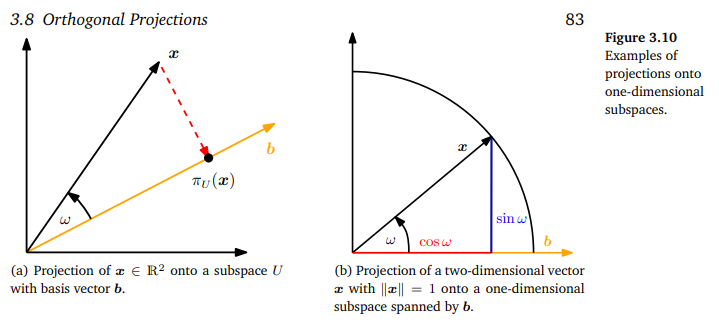
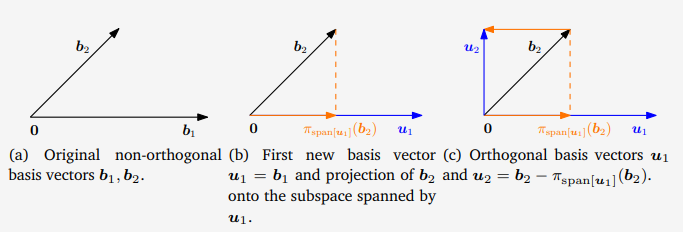

## Rotaciones

Una rotación es una transformación que gira un objeto alrededor de un punto o un eje. Se utiliza para cambiar la orientación de un objeto sin cambiar su forma ni su tamaño.

### Representación matricial de rotaciones

- **Matrices de rotación:** Las rotaciones en el espacio pueden representarse mediante matrices de rotación. Por ejemplo, una rotación en el plano xy en sentido antohorario por un ángulo $\theta$ se representa por la matriz:

$$
R(\theta) = 
\begin{bmatrix}
cos(\theta) & sin(\theta)\\
-sin(\theta) & cos(\theta)
\end{bmatrix}
$$

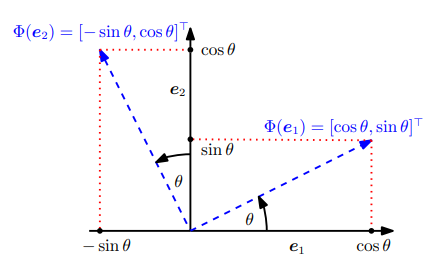

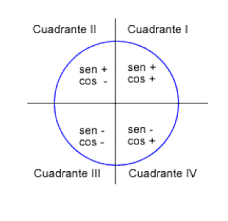

$$
e_1 = 
\begin{bmatrix}
1\\
0
\end{bmatrix},

e_2 = 
\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

Para $\theta = \frac{\pi}{2}$, la matriz de rotación se convierte en:

$$
R(\theta) = 

\begin{bmatrix}
cos(\frac{\pi}{2}) & -sin(\frac{\pi}{2})\\
sin(\frac{\pi}{2}) & cos(\frac{\pi}{2})
\end{bmatrix}

=

\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}
$$

Ahora, para rotar el vector $e_1 = (1, 0)$ usando esta matriz de rotación, multiplicamos la matriz por el vector.

$$
\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}

\begin{bmatrix}
1\\
0
\end{bmatrix}

=

\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

Después de aplicar la rotación de 90° en sentido antihorario, el vector $v$ se convierte en (0, 1). Esto representa el mismo vector rotado 90° en sentido antohorario en el plano bidimensional.

- **Propiedades de las matrices de rotación:** Las matrices de rotación son ortogonales, lo que significa que su traspuesta es igual a su inversar $R(\theta)^T = R(\theta)^{-1}$ y preservan las longitudes y los ángulos. 

### Utilidad en Machine Learning

- **Reducción de DImensionalidad:** En técnicas como el Análisis de Componentes Principales (PCA), las rotaciones se utilizan para transformar datos y encontrar las direcciones principales de variabilidad.
- **Aprendizaje profundo.** En ciertas arquitecturas de redes neuronales, las rotaciones se pueden utilizar para realizar transformaciones en las caractéristicas de entrada para mejorar el rendimiento del modelo.

#### Referencias
1. https://concepto.de/geometria-analitica/
2. https://metode.es/revistas-metode/secciones/cajon-de-ciencia/les-distancies-a-manhattan.html
3. https://es.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/x786f2022:vectors-and-matrices/a/dot-products-mvc#:~:text=El%20producto%20punto%20es%20una,vectores%20en%20la%20misma%20dirección.
4. https://www.calculisto.com/topics/producto-interno/summary/785

El resto ChatGPT.
